# Latar Belakang

Pasar Airbnb di Bangkok sangat kompetitif dengan beragam penginapan yang ditawarkan melalui Airbnb baik dari akomodasi mewah hingga akomodasi terjangkau. Ketika pelanggan menginap di Bangkok, pelanggan seringkali meninjau ulasan, harga, dan fasilitas yang ditawarkan dalam menentukan keputusan akomodasi yang ingin dipilih. Akan tetapi, cara ini berpotensi mengabaikan iklan-iklan yang menawarkan kompetensi serupa namun memiliki ulasan yang relatif sangat sedikit. Hal ini menimbulkan kecenderungan kurangnya kompetensi akibat kalah bersaing. Meskipun begitu, bagaimanapun akomodasi yang ditawarkan kompetitor yang memiliki lebih banyak ulasan, mereka memiliki keterbatasan tempat dan tidak mungkin bisa mengakomodasi pelanggan lebih banyak dari yang kapasitas tersedia. 

Bagi pemilik penginapan dan Airbnb, hal ini merupakan suatu kesempatan untuk mengidentifikasi/mengevaluasi terjadinya hal tersebut. Dengan begitu, ketika terdapat sangat banyak pelanggan yang tiba di Bangkok, pemilik penginapan dan Airbnb dapat menyediakan berbagai alternatif penginapan yang kompetitif sehingga akomodasi yang dimiliki dapat dikatakan memiliki 'value-for-money' yang sangat baik.

## Pernyataan Masalah

Para pemilik penginapan dan Airbnb ingin mengetahui iklan-iklan di Bangkok yang menawarkan 'value-for-money' yang sangat baik namun memiliki banyak review yang relatif sedikit. 

Kali ini, saya akan berperan sebagai data analyst Airbnb. Tujuan analisis data ini adalah:
1. Membantu para pemilik penginapan mengetahui kriteria-kriteria yang mampu membuat iklan mereka dalam daftar 'value-for-money' yang mampu menarik para pelanggan.
2. Membantu Airbnb mempromosikan iklan-iklan yang dapat diandalkan dan hemat biaya yang mungkin diabaikan oleh para pelanggan, sehingga pengalaman pemesanan bagi pelanggan yang sadar terhadap 'nilai' dapat meningkat.

# Dataset

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

### Kolom-kolom

Sebagai rangkuman, dataframe akan memuat kolom-kolom dalam file berikut.
https://drive.google.com/file/d/1v9Q__6ECVmrmADiCiaTGl3-dl2vnRNVY/view?usp=drive_link

In [127]:
# Import dari file .csv
df = pd.read_csv("Airbnb Listings Bangkok.csv")

In [128]:
# Preview dataframe
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Understanding

Alangkah baiknya jika data yang dianalisis merupakan data yang bersih dari kolom-kolom yang tidak dibutuhkan, entri yang kosong, dan data anomali. Akan tetapi, hal yang terlebih dahulu dilakukan adalah memahami data (yang diperoleh dari sumber .csv)

In [129]:
# Tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Informasi tipe data di atas menyatakan bahwa hampir semua kolom telah memiliki tipe data yang sesuai (di luar data anomali). Lebih lanjut, 

In [130]:
# Deskripsi data bertipe numerik
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [131]:
# Deskripsi data bertipe object
df.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [132]:
# Memeriksa data unik/tunggal
pd.set_option('display.max_colwidth', 0)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabelUnik = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
tabelUnik

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

Informasi Umum:
1. Terdapat 16 kolom dan 15854 baris pada dataset Airbnb Listings Bangkok.
2. Setiap kolom memiliki tipe data yang sudah sesuai.
3. Pada kolom kategorikal yakni kolom 'room_type', tidak ada data anomali.
4. Terdapat missing values pada empat kolom yang akan ditangani pada bagian selanjutnya.

## Data Preparation (Cleaning)

Alangkah baiknya jika data yang dianalisis merepresentasikan data yang bersih dari kolom-kolom yang tidak dibutuhkan, entri yang kosong, dan data anomali.

Terdapat kolom 'Unnamed: 0' pada dataframe yang merupakan indexing setiap data. Pandas dataframe dapat mengakses index suatu data tanpa membutuhkan kolom index, sehingga kolom ini dapat dibuang.

In [133]:
df.drop(columns='Unnamed: 0',inplace=True)

### Missing Values

Selanjutnya, akan diperiksa banyak missing values pada setiap kolom

In [134]:
# Banyak missing values pada setiap kolom/variabel
df.isna().sum()

id                                0   
name                              8   
host_id                           0   
host_name                         1   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [135]:
# Proporsi banyak missing values terhadap banyak data (dalam persentase)
df[['name','host_name','last_review','reviews_per_month']].isna().sum()/len(df)*100

name                 0.050460 
host_name            0.006308 
last_review          36.520752
reviews_per_month    36.520752
dtype: float64

Diperoleh bahwa missing values terdapat pada kolom 'name', 'host_name', 'last_review', dan 'reviews_per_month', dengan:

'name' --> 8 dari 15854 || 0.050%

'host_name' --> 1 dari 15854 || 0.006%

'last_review' --> 5790 dari 15854 || 36.521%

'reviews_per_month' --> 5790 dari 15854 || 36.521%

### last_review & reviews_per_month

Perhatikan bahwa terdapat sekitar 36,521% missing values pada kedua kolom 'last_review' dan 'reviews_per_month'. Proporsi tersebut tergolong sangat besar. Akan tetapi, secara kebetulan banyak missing values pada kedua kolom sama. Apakah tidak mengisi data pada kolom 'last_review' (saat input data) mengimplikasikan tidak mengisi juga data pada kolom 'reviews_per_month' ataupun sebaliknya?

<Axes: >

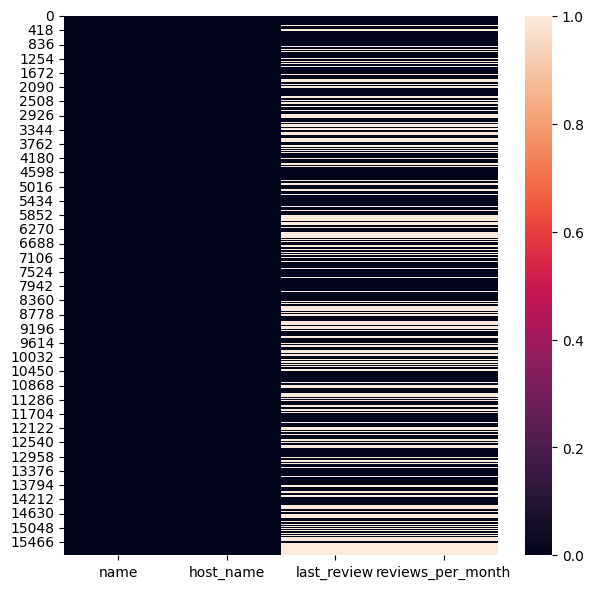

In [136]:
# Persebaran missing values (berdasarkan id)
plt.figure(figsize=(7,7))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

Berdasarkan heat map di atas, ketiadaan data 'last_review' sangat berkaitan dengan ketiadaan 'reviews_per_month'. Akan diperiksa apakah implikasi benar terjadi.

In [137]:
# Irisan missing values data pada kedua kolom 'last_review' dan 'reviews_per_month'
len(df[(df['last_review'].isna()) & (df['reviews_per_month'].isna())])

5790

Terdapat 5790 data beririsan dengan missing values pada kedua kolom 'last_review' dan 'reviews_per_month', yang merupakan banyak missing values pada kedua kolom tersebut. Hal ini membuktikan implikasi missing values pada kedua kolom.

Salah satu kasus kemungkinan fenomena ini adalah iklan tersebut sangat baru dipublikasi. Kasus ini menyatakan bahwa missing values pada kolom 'reviews_per_month' seharusnya bernilai nol sehingga tidak ada tanggal review terakhir yang dapat diinputkan. Akan diperiksa apakah terdapat 'reviews_per_month' bernilai nol pada dataframe.

In [138]:
# Banyak entri nol pada 'reviews_per_month'
len(df[df['reviews_per_month'] == 0])

0

Diperoleh bahwa belum ada data dengan 'reviews_per_month' bernilai nol. Kemudian, tinjau hubungan missing values data 'reviews_per_month' dengan 'number_of_reviews'.

In [139]:
# array index data dengan missing values pada 'reviews_per_month' dan nilai 0 pada 'number_of_reviews'
idx_nof0_rpm_na = df.loc[(df['reviews_per_month'].isna()) & (df['number_of_reviews'] == 0)].index

# array index data dengan missing values pada 'reviews_per_month'
idx_rpm_na = df.loc[df['reviews_per_month'].isna()].index

# Periksa apakah kedua array sebelumnya sama (per elemen)
(idx_nof0_rpm_na == idx_rpm_na).all()

np.True_

Hasil 'True' pada pengecekan di atas mengimplikasikan bahwa semua data dengan missing values pada kolom 'reviews_per_month' memiliki nilai nol pada 'number_of_reviews'. Hal ini memperkuat dugaan sebelumnya bahwa missing values pada kolom 'reviews_per_month' seharusnya berisikan nol. Akan tetapi, hal ini belum bisa menjelaskan apakah benar missing values pada kolom 'last_review' merupakan iklan terbaru, mungkin saja iklan sudah lama dipublikasi dan host tidak memberikan pembaharuan mengenai iklannya.

Di samping meninjau 'number_of_reviews', alternatif lainnya adalah meninjau hubungan missing values 'reviews_per_month' dengan 'number_of_reviews_ltm', yakni dalam 12 bulan terakhir.

In [140]:
# array index data dengan missing values pada 'reviews_per_month' dan nilai 0 pada 'number_of_reviews_ltm'
idx_nofltm0_rpm_na = df.loc[(df['reviews_per_month'].isna()) & (df['number_of_reviews_ltm'] == 0)].index

# array index data dengan missing values pada 'reviews_per_month' : idx_rpm_na 

# Periksa apakah kedua array sebelumnya sama (per elemen)
(idx_nofltm0_rpm_na == idx_rpm_na).all()

np.True_

Hasil 'True' pada pengecekan di atas memvalidasi bahwa semua data dengan missing values pada kolom 'reviews_per_month' seharusnya bernilai nol. Di samping itu, hal ini memvalidasi kondisi bahwa data dengan missing values ini merepresentasikan iklan yang belum pernah mendapatkan review sama sekali sepanjang waktu pengiklanan atau dalam 12 bulan terakhir. Oleh karena itu, isi missing values tersebut dengan nilai nol.

In [141]:
# Mengisi missing values 'reviews_per_month' dengan nilai 0, bertipe float
df['reviews_per_month'] = df['reviews_per_month'].fillna(value=0)

In [142]:
# Periksa banyak missing values pada kolom 'reviews_per_month'
df[['reviews_per_month']].isna().sum()

reviews_per_month    0
dtype: int64

Perhatikan bahwa tidak masuk akal mengisi tanggal review terakhir ketika tidak pernah ada review sebelumnya pada kolom 'last_review'.

Tinjau kembali bahwa kolom 'reviews_per_month' merepresentasikan banyak kepadatan jumlah review terhadap lama iklan terpublikasikan. Jika diketahui 'number_of_reviews' dan 'reviews_per_month', maka lama iklan terpublikasikan dapat diketahui. Akan tetapi, lamanya tersebut membutuhkan waktu pertama dan terakhir iklan tersebut ada.

In [143]:
# Tinjau tanggal terakhir review yang ada pada kolom 'last_review' di luar missing values
df[['last_review']][df['last_review'].notna()].sort_values(by = 'last_review', ascending = False, inplace = False).head(1)

,last_review
15796,2022-12-28


Diperoleh bahwa review terakhir ada pada akhir tahun 2022. Hal ini menjadi batasan analisis bahwa data iklan hanya ada hingga akhir tahun 2022. 
Dengan begitu, kolom baru yang merepresentasikan lama iklan terpublikasikan. Akan tetapi, terdapat kemungkinan pembagi nol dalam proses perhitungannya. Oleh karena itu, kolom bertipe numerik tidak cocok untuk kasus ini dan sebaiknya buat kolom bertipe kategori. Meskipun begitu, kolom bertipe numerik dapat dibuat untuk mendeteksi keberadaan outliers. Lebih lanjut, bangun 4 kategori:
1. new: kurang dari 12 bulan
2. intermediate: antara 12 hingga 36 bulan
3. old: lebih dari 36 bulan
4. unknown: tidak diketahui

*Pengambilan kategori tersebut didasarkan pada pengalaman pribadi dan belum ada rujukan mengenai kategori ini dari Airbnb

In [144]:
# Fungsi penghitung lama iklan terpublikasikan (dalam bulan)
def entry_months_existed(banyak_review, densitas_review_bulan):
    if densitas_review_bulan == 0:
        return 'unknown'
    return banyak_review / densitas_review_bulan

# Membuat kolom sementara 'months_existing' menggunakan fungsi di atas
df['months_existing'] = df.apply(lambda row: entry_months_existed(row['number_of_reviews'], row['reviews_per_month']), axis=1)

# Fungsi kategori lama iklan terpublikasikan
def entry_category_existing(bulan):
    if bulan == 'unknown':
        return 'unknown'
    elif bulan < 12:
        return 'new'
    elif 12 <= bulan <= 36:
        return 'intermediate'
    else:
        return 'old'

# Membuat kolom 'category_existing' menggunakan fungsi di atas
df['category_existing'] = df['months_existing'].apply(lambda x: entry_category_existing(float(x)) if x != 'unknown' else 'unknown')

In [145]:
# Periksa apakah kolom 'category_existing' telah ditambahkan
df[['category_existing']]

,category_existing
0,old
1,unknown
2,unknown
3,old
4,unknown
...,...
15849,unknown
15850,unknown
15851,unknown
15852,unknown


In [146]:
# Periksa apakah ada missing values pada kolom 'category_existing'
df[['category_existing']].isna().sum()

category_existing    0
dtype: int64

Karena kolom 'category_existing' telah ditambahkan, maka analisis data yang berkaitan dengan relevansi waktu iklan tempat penginapan dapat menggunakan kedua kolom 'category_existing' atau 'last_review'. Namun, karena kolom 'category_existing' tidak memuat missing values, maka kolom 'last_review' akan dibuang, mengingat terdapat sekitar 36% missing values.

In [147]:
# Hapus kolom 'last_review'
df.drop(columns = 'last_review', inplace = True)

In [148]:
# Periksa kembali banyak missing values
df.isna().sum()

id                                0
name                              8
host_id                           0
host_name                         1
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
months_existing                   0
category_existing                 0
dtype: int64

Dengan begitu, missing values pada kedua kolom 'reviews_per_month' dan 'last_review' telah ditangani.

### name & host_name

Terdapat sekitar '0.05%' dan '0.006%' missing values pada masing-masing data kolom 'name' dan 'host_name'. Karena proporsinya sangat kecil, maka data-data yang berkorespondensi dengan missing values tersebut akan dihapus.

In [149]:
# Menghapus data dengan missing values pada kolom 'name' dan 'host_name'
df.dropna(subset=['name','host_name'],inplace=True)

In [150]:
# Periksa kembali banyak missing values
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
months_existing                   0
category_existing                 0
dtype: int64

Dengan begitu, data telah bersih dari missing values.

In [151]:
df.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,months_existing,category_existing
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0,130.0,old
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0,unknown,unknown
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0,unknown,unknown
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1,66.666667,old
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0,unknown,unknown
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,0.17,41,365,0,111.764706,old
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,0.01,1,365,0,100.0,old
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461,1,0,0.00,1,365,0,unknown,unknown
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,0.09,1,365,0,111.111111,old
9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.72040,100.50757,Private room,700,2,4,0.03,10,87,0,133.333333,old


### Data Anomali

Sekarang, tinjau beberapa kolom yang dirasa berperan penting dalam analisis.

#### months_existing

Perlu diketahui bahwa Airbnb pertama kali beroperasi pada tahun 2007 dan asumsikan listing di Bangkok dapat dilakukan pada tahun tersebut. Dengan begitu, tidak boleh ada listing/iklan dengan lama waktu terpublikasi lebih dari 15 tahun atau 180 bulan.

In [152]:
# Periksa nilai terbesar month_existing
df[['months_existing']][df['months_existing'] != 'unknown'].max()

months_existing    150.0
dtype: object

Diperoleh paling lama suatu iklan terpublikasikan, atau penginapan telah diiklankan adalah 150 bulan. Hal ini tidak melanggar usia Airbnb. Akan tetapi, dalam hal analisis, kolom 'category_existing' akan menggantikan peran kolom ini sehingga kolom ini akan dihapus.

In [153]:
# Hapus kolom 'months_existing'
df.drop(columns = 'months_existing', inplace = True)

#### availability_365

Kolom ini menyatakan kesediaan suatu penginapan dalam 365 hari mendatang. Perhatikan bahwa terdapat nilai nol pada kolom ini. Hal ini mungkin saja merepresentasikan penginapan yang benar-benar penuh ter-booking atau iklan telah diblokir oleh pemilik/host. Namun, tidak ada cara untuk mengetahui alasan dibalik nilai nol pada kolom ini. Selain itu, tidak mungkin seseorang akan mempertimbangkan penginapan yang tidak tersedia di masa depan. Oleh karena itu, hapus data dengan kondisi ini dengan meninjau proporsinya (banyak data yang akan dihapus).

In [154]:
# Proporsi banyak listing yang tidak tersedia di masa depan terhadap semua listing dalam dataframe (dalam persentase)
len(df[df['availability_365'] == 0])/len(df)*100

5.408646260650047

In [155]:
# Banyak listing yang tidak tersedia di masa depan
len(df[df['availability_365'] == 0])

857

Terdapat sekitar 5.408% atau 857 penginapan yang tidak tersedia di masa depan. Proporsi tersebut terbilang relatif sedikit sehingga penghapusan data tersebut akan dilakukan.

In [156]:
# Hapus data dengan 'availability_365' bernilai nol
df = df.drop(df[df['availability_365'] == 0].index)

In [157]:
# Periksa apakah data telah terhapus
len(df[df['availability_365'] == 0])

0

#### price

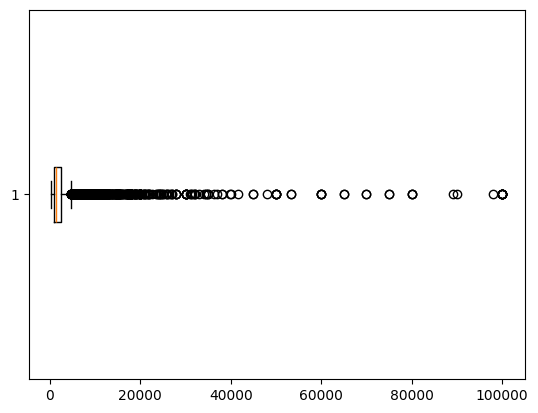

In [158]:
# Periksa normality dari data 'price'
plt.boxplot(df['price'][df['price'] <= 100000],vert=0)
plt.show()

Boxplot di atas dapat mengindikasikan banyaknya data outliers khususnya di atas kuartil ketiga.

Sebelumnya, diperoleh bahwa kolom price bertipe integer dalam satuan Baht Thailand. Akan dicari pagar outliers dari data price ini.

In [159]:
# Q1 dan Q3 price
q1_price = df['price'].quantile(0.25)
q3_price = df['price'].quantile(0.75)
iqr_price = q3_price - q1_price

# Pagar bawah dan atas outliers price
lowerbound_price = q1_price - 1.5 * iqr_price
upperbound_price = q3_price + 1.5 * iqr_price
display(lowerbound_price,upperbound_price)

np.float64(-1386.0)

np.float64(4710.0)

In [160]:
# Tinjau statistika deskriptif kolom price
df[['price']].describe()

,price
count,1.498800e+04
mean,3.259859e+03
std,2.563967e+04
min,2.780000e+02
25%,9.000000e+02
50%,1.446000e+03
75%,2.424000e+03
max,1.100000e+06


Sebagai verifikasi, tinjau bahwa harga per hari terkecil yang ada adalah 278 baht (125000 rupiah, kurs 31 Desember 2022). Hal ini menyatakan bahwa harga tergolong masuk akal. Akan tetapi, tidak masuk akal jika rata-rata harga per hari adalah 3260 baht (1467000 rupiah, kurs 31 Desember 2022) dan harga per hari terbesar adalah 1100000 baht (495000000 rupiah, kurs 31 Desember 2022), mengingat harga tersebut tergolong mahal untuk dipilih kebanyakan orang. Dengan begitu, terdapat outliers berdasarkan pagar-pagar yang telah ditentukan sebelumnya.

In [161]:
# Harga per hari sebagai outliers
df[(df['price'] > upperbound_price) | (df['price'] <= 0)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,category_existing
17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,0.09,6,180,0,old
18,105042,Central Bangkok 3 Bedroom Apartment,545890,Henry,Khlong Toei,13.733780,100.563030,Entire home/apt,5680,28,148,1.08,1,334,0,old
19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,2.59,1,349,3,old
34,978531,Urban Oasis in the heart of Bangkok,5309669,Apiradee,Sathon,13.722910,100.537590,Entire home/apt,5429,2,3,0.03,3,174,0,old
48,185364,Beautiful Wood Bangkok Resort House,889670,Narumon,Nong Chok,13.779000,100.836710,Entire home/apt,8658,1,0,0.00,1,363,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15756,786741911434733026,Private Home for 12-16 Guests 8 Parking,435016000,Tadchon,Lat Phrao,13.827958,100.591895,Entire home/apt,17900,2,0,0.00,10,362,0,unknown
15757,786742271004207966,Private Hotel for 12-16 Guests,435016000,Tadchon,Chatu Chak,13.821809,100.563067,Private room,17900,2,0,0.00,10,362,0,unknown
15765,786834873763460489,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.735632,100.567862,Entire home/apt,7589,1,0,0.00,44,364,0,unknown
15766,786852847114140309,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.734753,100.566682,Entire home/apt,7589,1,0,0.00,44,364,0,unknown


In [162]:
# proporsi banyak outliers harga terhadap keseluruhan data (dalam persentase)
len(df[(df['price'] > upperbound_price) | (df['price'] <= 0)])/len(df)*100

8.726981585268215

Terdapat sekitar 8.727% atau 1308 data yang memuat harga sebagai outliers. Meskipun terlihat relatif banyak, 'value-for-money' menjadi kata kunci dari analisis data ini. Oleh karena itu, akan dihapus data tersebut.

In [163]:
# Hapus data outliers pada 'price'
df = df.drop(df[(df['price'] > upperbound_price) | (df['price'] <= 0)].index)

In [164]:
# Periksa apakah data telah terhapus
len(df[(df['price'] > upperbound_price) | (df['price'] <= 0)])

0

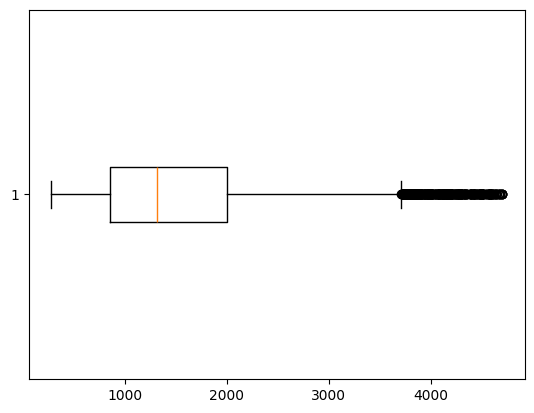

In [165]:
# Boxplot price baru
plt.boxplot(df['price'],vert=0)
plt.show()

Dengan begitu, harga suatu penginapan lebih masuk akal dalam mempertimbangkan value-for-money

#### minimum_nights

Airbnb menyediakan dua tipe penginapan:
1. Short-term renting (STR) untuk durasi penginapan di bawah 28 hari
2. Long-term renting (LTR) untuk durasi penginapan minimal 28 hari

Karena penggolongan ini belum ada pada dataframe, buat kolom baru 'duration_renting' dengan values 'short-term' dan 'long-term'.

In [166]:
# Fungsi kategori durasi penginapan
def entry_duration_renting(days):
    if days < 28:
        return 'short-term'
    elif days >= 28:
        return 'long-term'

# Membuat kolom sementara 'months_existing' menggunakan fungsi di atas
df['duration_renting'] = df.apply(lambda row: entry_duration_renting(row['minimum_nights']), axis=1)

Tinjau proporsi STR dan LTR terhadap keseluruhan data penginapan yang diiklankan

In [167]:
# Proporsi STR (persentase)
len(df[(df['duration_renting'] == 'short-term')])/len(df)*100

81.22076023391813

In [168]:
# Proporsi LTR (persentase)
len(df[(df['duration_renting'] == 'long-term')])/len(df)*100

18.779239766081872

Diperoleh sekitar 81.22% penginapan tergolong short-term renting, dan sekitar 18.78% penginapan tergolong long-term renting (yang tergolong cukup banyak). Dalam analisis selanjutnya, pisahkan dataframe berdasarkan kedua kategori ini.

Tinjau kasus kesediaan durasi akomodasi kurang dari durasi minimal pemesanan akomodasi. Meskipun hal ini mungkin terjadi, tidak mungkin seseorang akan mempertimbangkan penginapan yang tidak mampu menyediakan waktu yang disyaratkan oleh pemilik penginapan itu sendiri. Hal ini juga menjadi batasan analisis bahwa 365 hari adalah maksimal banyak hari pemesanan suatu penginapan. Oleh karena itu, anggap data sebagai outliers dan hapus data dengan kasus ini.

In [169]:
# Proporsi outliers minimum_nights khusus pada penginapan 
len(df[df['minimum_nights'] > df['availability_365']])/len(df)*100

1.425438596491228

Terdapat sekitar 1.42% data outliers pada kolom 'minimum_nights'. Hal ini tergolong sangat sedikit.

In [170]:
# Hapus data dengan kesediaan durasi akomodasi kurang dari durasi minimal pemesanan akomodasi untuk long-term renting
df = df.drop(df[df['minimum_nights'] > df['availability_365']].index)

In [171]:
# Periksa kembali apakah data telah dihapus
len(df[df['minimum_nights'] > df['availability_365']])

0

Sekarang, tinjau kembali proporsi penginapan STR dan LTR

In [172]:
# Proporsi STR (persentase)
len(df[(df['duration_renting'] == 'short-term')])/len(df)*100

82.24694104560622

In [173]:
# Proporsi LTR (persentase)
len(df[(df['duration_renting'] == 'long-term')])/len(df)*100

17.753058954393772

Proporsi penginapan STR dan LTR tidak berubah secara signifikan. Dengan begitu, outliers data pada kolom 'minimum_nights' telah dihandle.

In [174]:
15854 - len(df)

2369

Terakhir, periksa apakah terdapat data duplikat pada dataframe.

In [175]:
# Banyak data duplikat
len(df[df.duplicated(keep='last') == True])

0

Diperoleh bahwa data bebas dari duplikasi. Secara keseluruhan, proses data cleaning ini (termasuk batasan analisis) mereduksi 2369 data.

## Data Analysis

Sebelum analisis dilakukan, buat dua dataframe terpisah berdasarkan penginapan STR dan LTR

In [177]:
# Dataframe STR
df_str = df[df['duration_renting'] == 'short-term']
df_str

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,category_existing,duration_renting
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,0.50,2,353,0,old,short-term
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0.00,2,358,0,unknown,short-term
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,0.03,1,323,1,old,short-term
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0.00,3,365,0,unknown,short-term
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.685560,100.495350,Private room,1558,3,1,0.01,1,365,0,old,short-term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,790460476887978054,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752904,100.540381,Private room,1400,1,0,0.00,14,357,0,unknown,short-term
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0.00,14,365,0,unknown,short-term
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0.00,14,365,0,unknown,short-term
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0.00,14,365,0,unknown,short-term


In [178]:
# Dataframe LTR
df_ltr = df[df['duration_renting'] == 'long-term']
df_ltr

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,category_existing,duration_renting
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0.00,1,365,0,unknown,long-term
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.697570,100.528800,Entire home/apt,1000,250,19,0.17,41,365,0,old,long-term
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,0.00,1,365,0,unknown,long-term
16,1791481,Nice and Quiet condo near BTS Onnut,9399478,Piyakorn,Khlong Toei,13.707190,100.599360,Entire home/apt,1577,30,78,0.78,1,330,0,old,long-term
21,113744,River View - Ivy Condo (1 Bedroom),578110,Muay,Rat Burana,13.685680,100.492310,Private room,1385,30,0,0.00,1,365,0,unknown,long-term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15805,789440470509021553,supremesky pool@chitlom,342811212,Miu Miu,Ratchathewi,13.750080,100.540229,Entire home/apt,2343,29,0,0.00,23,328,0,unknown,long-term
15833,790283533781929861,iSanook Suite 34 sqm 8,8663142,ISanook Hotel,Bang Rak,13.733555,100.522394,Private room,1900,30,0,0.00,45,363,0,unknown,long-term
15839,790404714116491557,Ratchada Condo next To MRT,34432625,Alex,Huai Khwang,13.763732,100.569455,Entire home/apt,2100,28,0,0.00,2,332,0,unknown,long-term
15840,790441848994752308,Sukhumvit Condo Next to BTS,34432625,Alex,Bang Na,13.665395,100.603951,Entire home/apt,1400,28,0,0.00,2,364,0,unknown,long-term


Dalam melakukan analisis data ini, prosedur dilakukan dengan mencoba menjawab beberapa pertanyaan yang berkaitan dengan masalah.

In [183]:
df.to_csv('Airbnb Bangkok aftar preprocessing.csv',index=False)

#### 1. Faktor apa saja yang memengaruhi secara signifikan pandangan value-for-money pada iklan?

##### Berdasarkan harga

Dalam menentukan center dari distribusi harga, uji terlebih dahulu kenormalan data kolom 'price' untuk kedua short-term renting (STR) dan long-term renting (LTR)

In [184]:
# cek distribusi kolom 'price' untuk STR
from scipy.stats import normaltest
stats, pval = normaltest(df_str['price'])
if pval<=0.05:
    print('tidak normal') # H1 
else: 
    print('distribusi normal') # H0

tidak normal


In [185]:
# cek distribusi kolom 'price' untuk LTR
from scipy.stats import normaltest
stats, pval = normaltest(df_ltr['price'])
if pval<=0.05:
    print('tidak normal') # H1 
else: 
    print('distribusi normal') # H0

tidak normal


Diperoleh baik harga untuk penginapan STR dan LTR tidak berdistribusi normal. Oleh karena itu, gunakan median sebagai pengukuran pusat data harga.

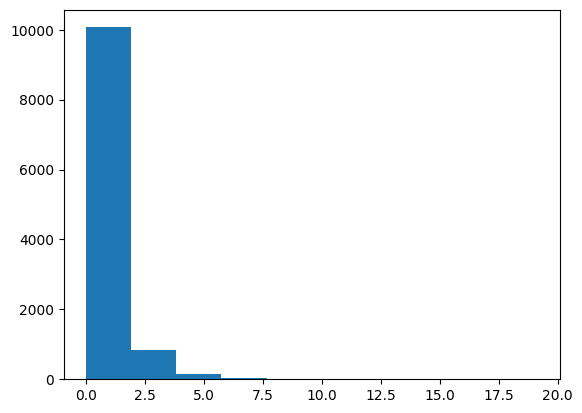

In [188]:
# Harga berdasarkan lama iklan STR terpublikasi
plt.hist(df_str['reviews_per_month'])
# plt.xlabel('')
plt.show()

In [ ]:
# Harga berdasarkan lama iklan LTR terpublikasi

#### 2. Apakah ada suatu daerah tertentu dengan iklan-iklan penginapan menumpuk (cukup padat iklan pada daerah tersebut)?

#### 3. Bagaimana dampak engagement pemilik penginapan terhadap pandangan nilai dan kemampuan untuk dipercaya?

#### 4. Bagaimana peran review terbaru dan harga dalam mempengaruhi daya tarik iklan?

#### 5. Bagaimana cara pengaturan harga dapat membuat iklan-iklan yang 'terabaikan' terlihat lebih menarik?